# ACGPN

In [1]:
!git clone https://github.com/vedikaaaa/ACGPN.git
%cd ACGPN

Cloning into 'ACGPN'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 86 (delta 4), reused 82 (delta 3), pack-reused 0
Unpacking objects: 100% (86/86), done.
/content/ACGPN


In [2]:
!pip install ninja

     |████████████████████████████████| 108 kB 12.9 MB/s 


In [3]:
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

In [4]:
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [5]:
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/ACGPN/pose
Downloading...
From: https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
To: /content/ACGPN/pose/pose_iter_440000.caffemodel
100% 209M/209M [00:02<00:00, 84.6MB/s]
/content/ACGPN


In [6]:
!git clone https://github.com/vedikaaaa/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/vedikaaaa/U-2-Net.git

Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 596, done.
remote: Counting objects: 100% (596/596), done.
remote: Compressing objects: 100% (488/488), done.
remote: Total 596 (delta 100), reused 593 (delta 100), pack-reused 0
Receiving objects: 100% (596/596), 3.53 MiB | 15.19 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Cloning into 'U-2-Net'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 194 (delta 5), reused 191 (delta 5), pack-reused 0
Receiving objects: 100% (194/194), 25.07 MiB | 19.04 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [7]:
#for segmentation mask generation
url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
output = 'lip_final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
To: /content/ACGPN/lip_final.pth
100%|██████████| 267M/267M [00:02<00:00, 90.6MB/s]


'lip_final.pth'

In [8]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/ACGPN/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 31.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
100% 176M/176M [00:02<00:00, 81.9MB/s]
...load U2NEP---4.7 MB
/content/ACGPN


In [9]:
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

Downloading...
From: https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx
To: /content/ACGPN/checkpoints/ACGPN_checkpoints.zip
100%|██████████| 524M/524M [00:18<00:00, 28.2MB/s]


/content/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
   creating: label2city/
  inflating: label2city/latest_net_G.pth  
  inflating: label2city/latest_net_G1.pth  
  inflating: label2city/latest_net_G2.pth  
  inflating: label2city/latest_net_U.pth  
  inflating: label2city/opt.txt      
/content/ACGPN


### Please upload your cloth image below

In [10]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..


/content/ACGPN/inputs/cloth


Saving i1.jpeg to i1.jpeg
Saving i2.jpeg to i2.jpeg
Saving i3.jpeg to i3.jpeg
Saving i4.jpeg to i4.jpeg
Saving i5.jpeg to i5.jpeg
Saving i6.jpeg to i6.jpeg
Saving i7.jpeg to i7.jpeg
Saving i8.jpeg to i8.jpeg
Saving i9.jpeg to i9.jpeg
/content/ACGPN/inputs
/content/ACGPN


### Please upload your person image below

In [11]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/img


Saving original_user_image.jpeg to original_user_image.jpeg
/content/ACGPN/inputs
/content/ACGPN


In [12]:
sorted(os.listdir('inputs/cloth'))

['i1.jpeg',
 'i2.jpeg',
 'i3.jpeg',
 'i4.jpeg',
 'i5.jpeg',
 'i6.jpeg',
 'i7.jpeg',
 'i8.jpeg',
 'i9.jpeg']

In [13]:
# finding numbers of images uploaded by user
path, dirs, files = next(os.walk("/content/ACGPN/inputs/cloth"))
file_count = len(files)
print(file_count)

9


In [14]:
# cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[i-1])
# print(cloth_path)

In [15]:
import time
result=[]
for i in range (1,file_count+1):
  cloth_name= '00000'+f'{i}'+"_"+f'{i}'+'.png'
  img_name= '00000'+f'{i}'+"_0"+'.png'
  cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[i-1])
  cloth = Image.open(cloth_path)
  cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
  cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

  u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')
  os.listdir('inputs/img')

  #processing images one by one
  start_time = time.time()
  img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[0])
  img = Image.open(img_path)
  img = img.resize((192,256), Image.BICUBIC)

  img_path = os.path.join('Data_preprocessing/test_img', img_name)
  img.save(img_path)
  resize_time = time.time()
  print('Resized image in {}s'.format(resize_time-start_time))

  !python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
  parse_time = time.time()
  print('Parsing generated in {}s'.format(parse_time-resize_time))

  pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
  generate_pose_keypoints(img_path, pose_path)
  pose_time = time.time()
  print('Pose map generated in {}s'.format(pose_time-parse_time))

  !rm -rf Data_preprocessing/test_pairs.txt
  with open('Data_preprocessing/test_pairs.txt','w') as f:
    generated_file= img_name+" "+cloth_name
    f.write(generated_file)
  
  !python test.py

  #display outputs
  output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/'+img_name)),
                       np.array(Image.open('Data_preprocessing/test_color/'+cloth_name)),
                       np.array(Image.open('results/test/try-on/'+img_name))], axis=1)        
  image_grid = Image.fromarray(output_grid)
  result.append(image_grid)


Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png
Resized image in 0.012765884399414062s
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100% 1/1 [00:00<00:00,  2.46it/s]
Parsing generated in 65.88615393638611s
File saved at Data_preprocessing/test_pose/000001_0_keypoints.json
Pose map generated in 14.722209453582764s
?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
eng

### Check results in 'results' folder!

**Deleting all images**

In [16]:

# for i in range(file_count):
#   img = Image. fromarray(result, 'RGB')
#   img.show()

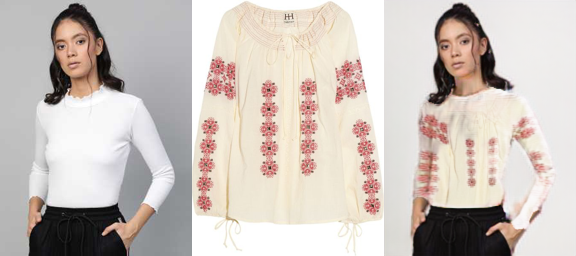

In [17]:
result[0]

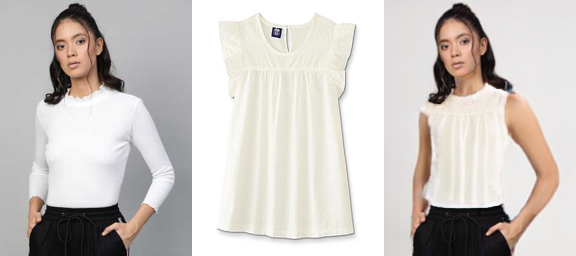

In [18]:
result[1]

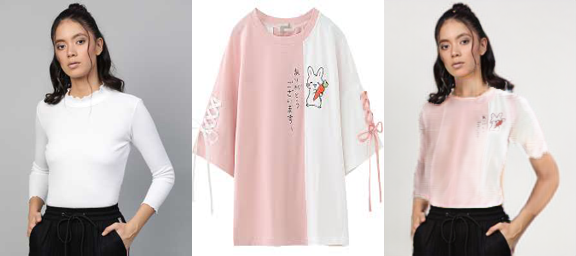

In [19]:
result[2]

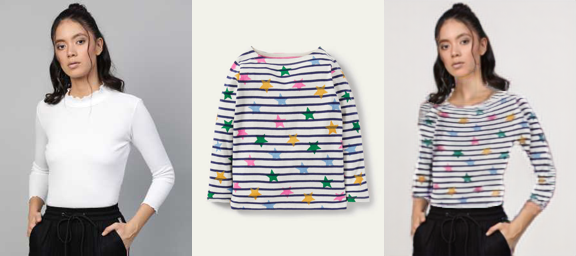

In [20]:
result[3]

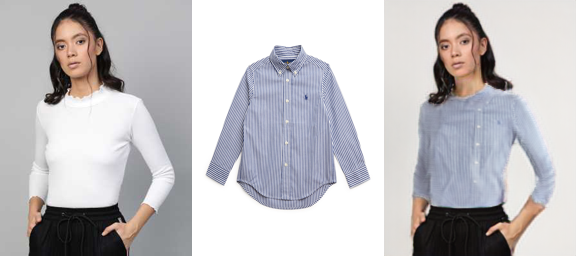

In [21]:
result[4]

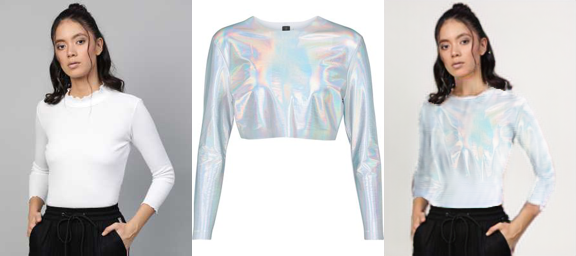

In [22]:
result[5]

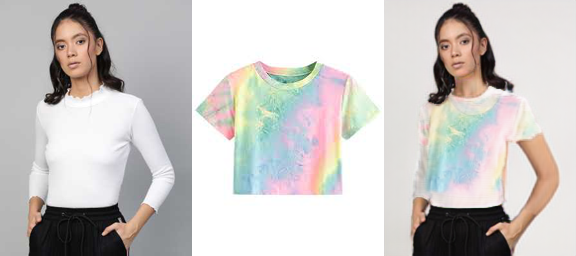

In [23]:
result[6]

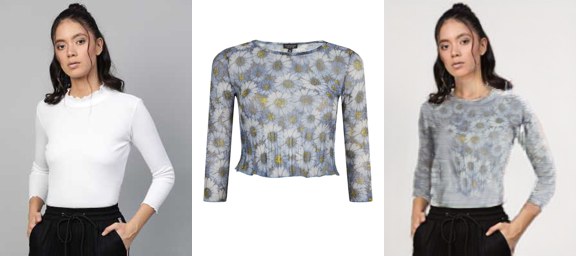

In [24]:
result[7]

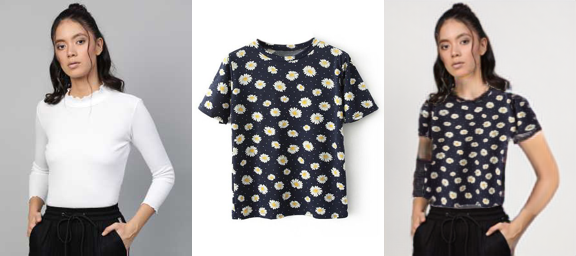

In [25]:
result[8]

In [26]:
result[9]

IndexError: ignored

#ONLY RUN THESE CELLS AFTER GETTING ALL THE IMAGES TO FRONT END AS IT DELETES ALL THE DATA FOR THE NEXT RUN CYCLE

In [ ]:
# !rm -rf Data_preprocessing/test_color/*
# !rm -rf Data_preprocessing/test_colormask/*
# !rm -rf Data_preprocessing/test_edge/*
# !rm -rf Data_preprocessing/test_img/*
# !rm -rf Data_preprocessing/test_label/*
# !rm -rf Data_preprocessing/test_mask/*
# !rm -rf Data_preprocessing/test_pose/*
# !rm -rf inputs/cloth/*
# !rm -rf inputs/img/*

In [ ]:
# !rm -rf results/*

In [ ]:
# %cd /content/